In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import  metrics
from sklearn import decomposition
from sklearn import datasets
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')


In [47]:
print(train.shape,test.shape)

(42000, 785) (28000, 784)


In [48]:
y_train = train['label'].values
X_train = train.drop(columns=['label']).values/255
X_test = test.values/255

Text(0.5, 1.0, '4')

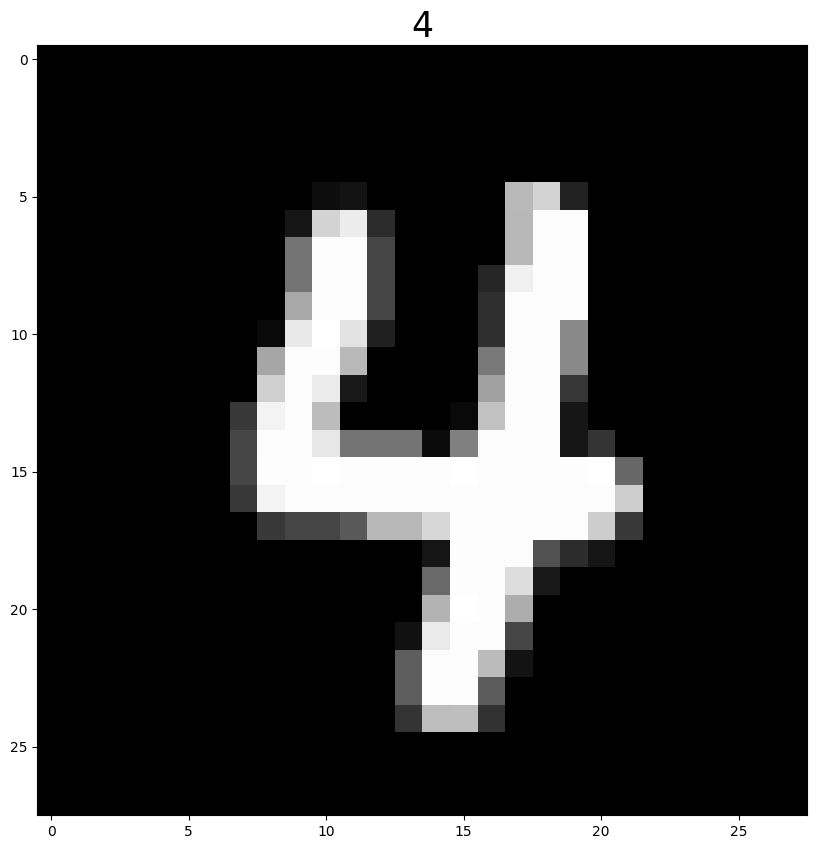

In [49]:
fig, axes = plt.subplots(1,1, figsize=(20,10))
idx = np.random.randint(0,42000)
axes.imshow(X_train[idx,:].reshape(28,28), cmap='gray')
axes.set_title(str(int(y_train[idx])), color= 'black', fontsize=25)


In [50]:
label_train=train['label']
train=train.drop('label', axis=1)
train = train / 255
test = test / 255
train['label'] = label_train

In [51]:
from sklearn.neural_network import MLPClassifier
y = train['label'][0:20000]
X=train.drop('label', axis=1)[0:20000]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(3500,), random_state=1)
clf.fit(X, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(3500,), random_state=1,
              solver='lbfgs')

In [53]:
from sklearn import  metrics
predicted = clf.predict(train.drop('label', axis=1)[20001:42000])
expected = train['label'][20001:42000]

In [54]:
print(metrics.confusion_matrix(expected, predicted))

[[2163    0    4    1    2    3   21    0    3    3]
 [   0 2389    8    1    1    4    3    5    6    1]
 [   6    1 2101   16    2    1    6   22   11    1]
 [   6    5   15 2167    0   28    2   15   19   13]
 [   4    5    6    0 2038    0   11    6    5   26]
 [   6    4    3   32    0 1910   18    2   13   13]
 [  13    2    3    0    6   12 2115    1    3    0]
 [   6    4    8    2    9    4    0 2276    3   19]
 [   5   12   13   14    7    9    9    6 2066    7]
 [   7    5    4   14   24    8    0   21   23 2102]]


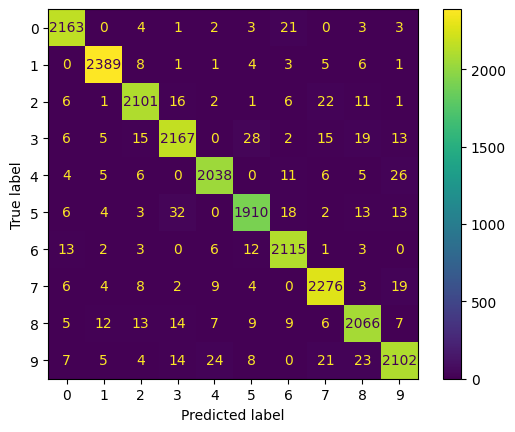

In [55]:
from sklearn.metrics import  ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(expected, predicted)
plt.show()